# Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read Dataset

In [42]:
df1 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Data Preprocessing

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [44]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


# Null Value Treatment

In [45]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [46]:
df1.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1['Frequency'] = df1['Frequency'].astype('category')
df1['Month'] = df1['Date'].dt.month
df1['Month_int'] = df1['Month'].apply(lambda x: int(x))
df1['Month_name'] = df1['Month_int'].apply(lambda x: calendar.month_abbr[x])
df1['Region'] = df1['Region'].astype('category')
df1.drop(columns='Month', inplace=True)

In [47]:
df1.head(1)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan


# HeatMap

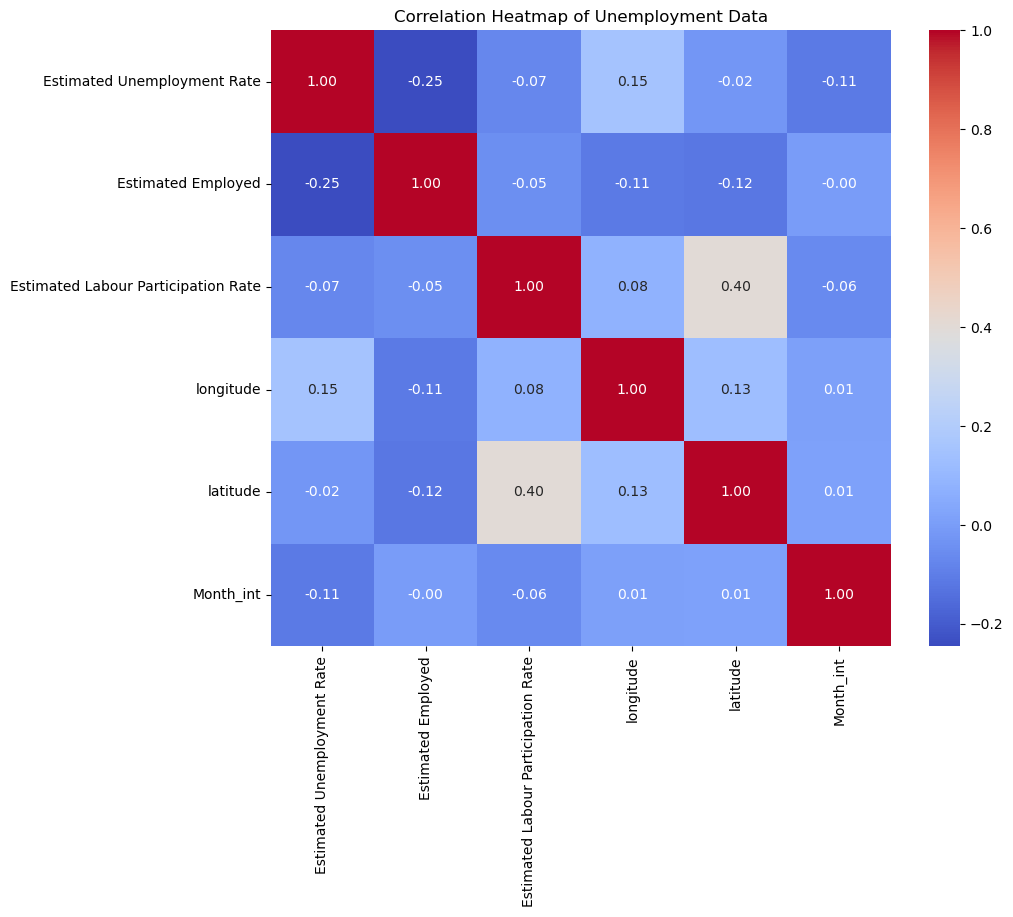

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Unemployment Data')
plt.show()

# Unemployment rate according to different regions of India:

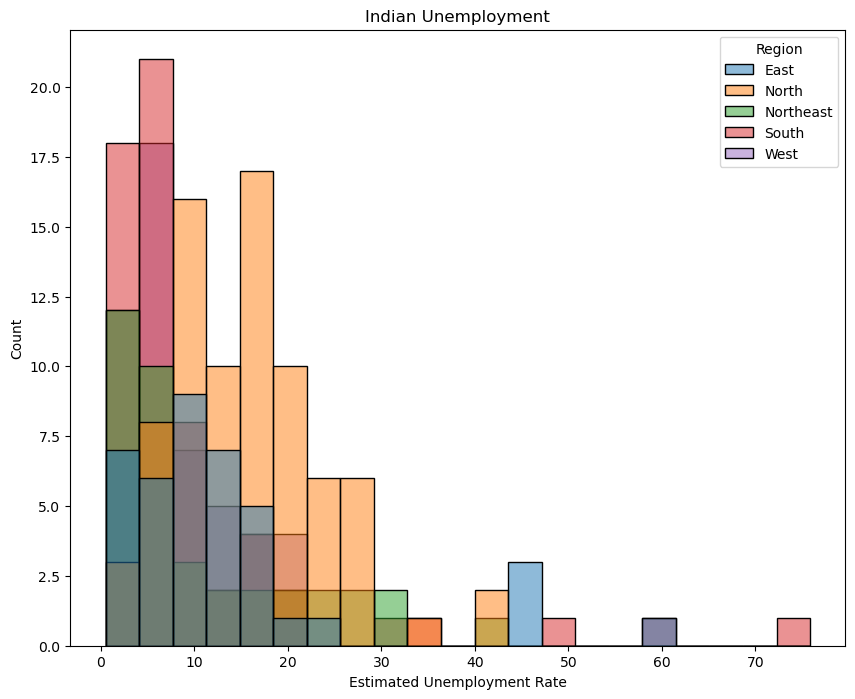

In [49]:
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df1)
plt.show()

# Scatter plot for Unemplyment rate

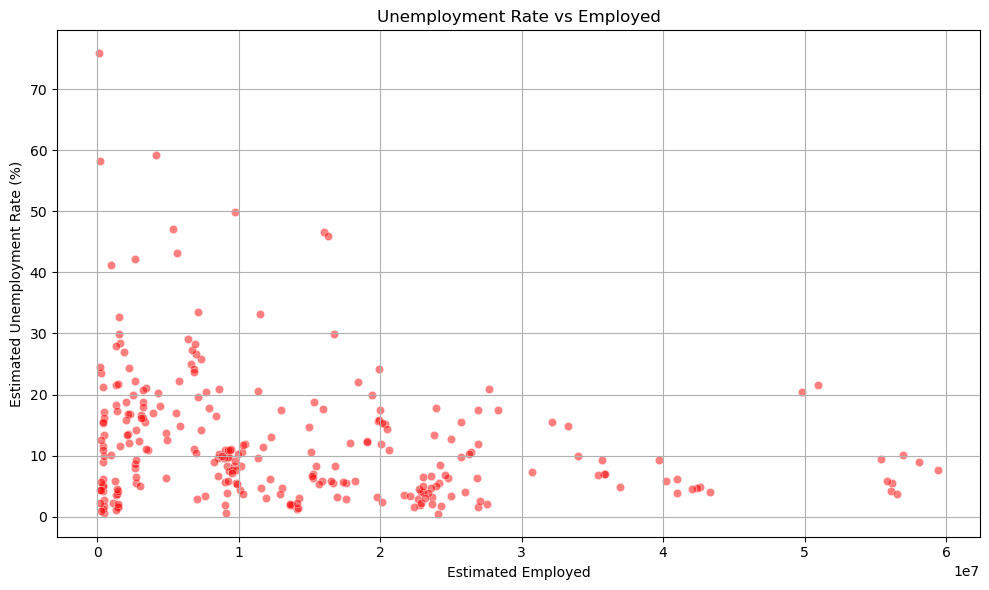

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Estimated Employed', y='Estimated Unemployment Rate', color='r', alpha=0.5)
plt.title('Unemployment Rate vs Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# BoxPlot for Estimated unemployment by State

In [51]:
fig = px.box(df1, x='State', y='Estimated Unemployment Rate', color='State', title='Unemployment Rate Per States', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Mean Employment by region

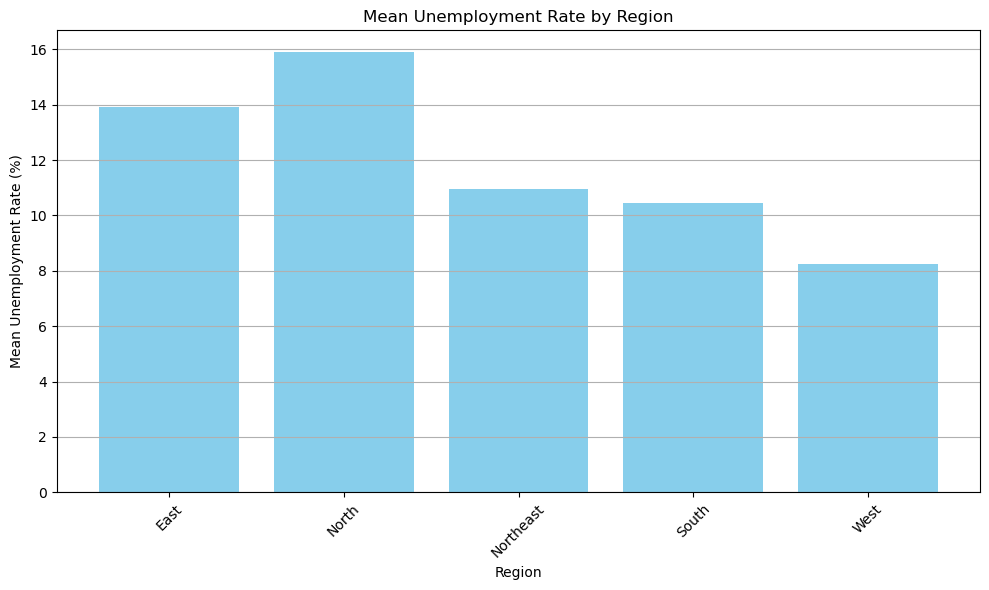

In [52]:
mean_unemployment_by_region = df1.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Step 4: Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_unemployment_by_region['Region'], mean_unemployment_by_region['Estimated Unemployment Rate'], color='skyblue')
plt.title('Mean Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Average Unemployment Rate in each state

In [53]:
import plotly.express as px

In [54]:
plot_ump = df1[['Estimated Unemployment Rate', 'State']]
df_unemp = plot_ump.groupby('State').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='State', y='Estimated Unemployment Rate', color='State',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()